<a href="https://colab.research.google.com/github/GyanendraChaubey/TransferLearningPOC/blob/main/TransferLearningPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

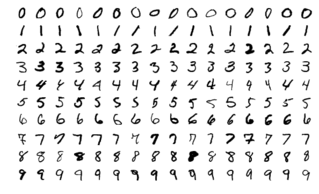

#MNIST Dataset

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full[0].shape

(28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_train_full[0]

5

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

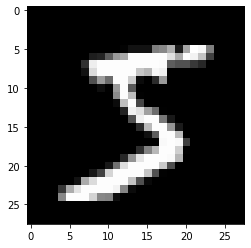

In [11]:
plt.imshow(img, cmap="gray")

In [12]:
label = y_train_full[0]
label

5

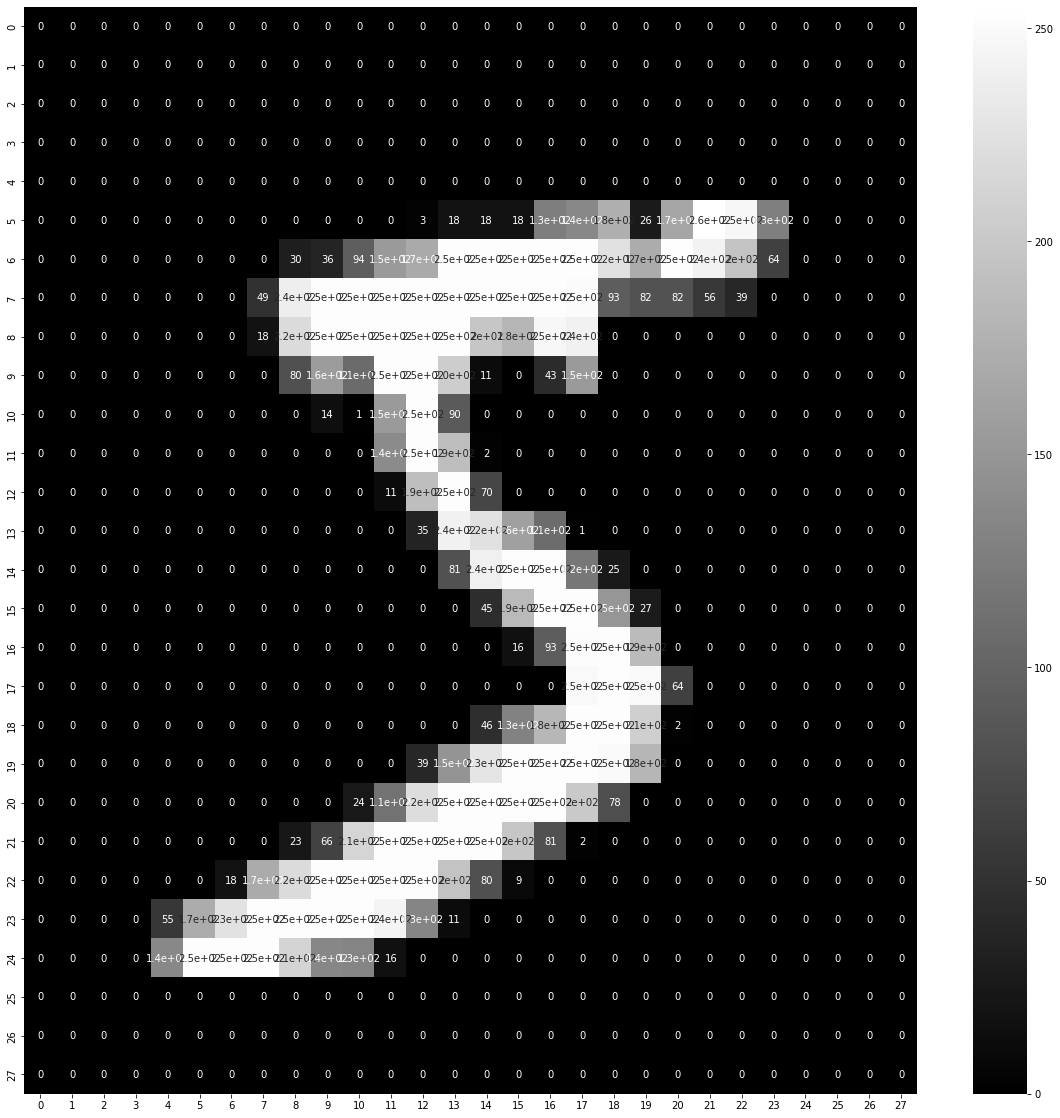

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(img, annot=True, cmap="gray")

In [14]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [15]:
1.5 * 10 ** 2

150.0

In [16]:
1.5e+2

150.0

1. *0 -> 255 => More Computation time, and Search space is large for finding solution
2. 0 - 1 => 

In [17]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test=X_test/255

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [20]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"),
    tf.keras.layers.Dense(CLASSES, activation="Softmax", name="outputLayer")
]

In [21]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
784*300+300

235500

In [24]:
300*100+100

30100

In [25]:
100*10+10

1010

In [26]:
235500+30100+1010

266610

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZERS, metrics=METRICS)

In [28]:
EPOCHS= 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train, 
    y_train,
    epochs=EPOCHS,
    validation_data=VALIDATION

)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6179 - accuracy: 0.8411 - val_loss: 0.3043 - val_accuracy: 0.9170
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2879 - accuracy: 0.9182 - val_loss: 0.2390 - val_accuracy: 0.9320
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2346 - accuracy: 0.9337 - val_loss: 0.1999 - val_accuracy: 0.9430
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1995 - accuracy: 0.9431 - val_loss: 0.1743 - val_accuracy: 0.9526
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1732 - accuracy: 0.9510 - val_loss: 0.1531 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1526 - accuracy: 0.9562 - val_loss: 0.1434 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1366 - accuracy: 0.9612 - val_loss: 0.1281 - val_accuracy:

In [29]:
55000/32 # by default batch size is 32

1718.75

In [30]:
55000/16

3437.5

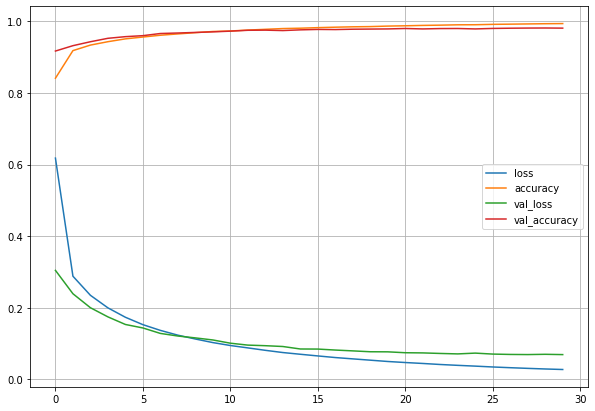

In [31]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [32]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9785


[0.07098811119794846, 0.9785000085830688]

In [33]:
model_clf.save("mnist_full.h5")

In [34]:
X_new = X_test[:3]

y_prob =model_clf.predict(X_new)
y_prob

array([[1.02391164e-06, 2.89703507e-07, 9.69739122e-05, 2.22084753e-04,
        1.87125315e-09, 5.49959964e-07, 5.25531355e-12, 9.99673247e-01,
        1.14165709e-06, 4.68914368e-06],
       [9.02925933e-07, 6.19162020e-05, 9.99570072e-01, 3.02503613e-04,
        1.80247993e-12, 9.46163041e-08, 2.71275894e-07, 3.29554301e-11,
        6.41735096e-05, 1.22065238e-12],
       [4.45423348e-06, 9.98486400e-01, 9.46869986e-05, 5.04158124e-05,
        1.56226248e-04, 1.42454755e-05, 8.15275052e-05, 4.44624020e-04,
        6.46956789e-04, 2.04221324e-05]], dtype=float32)

In [35]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]], dtype=float32)

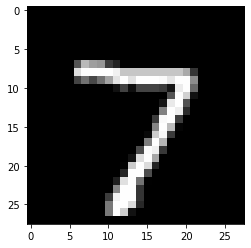

In [36]:
plt.imshow(X_new[0], cmap="gray")

In [37]:
Y_pred = np.argmax(y_prob, axis=1)
Y_pred

array([7, 2, 1])

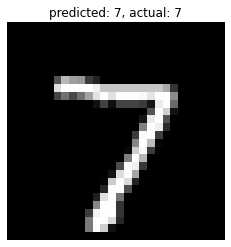

------------------------------------------------------------


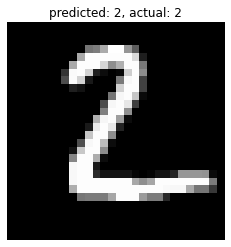

------------------------------------------------------------


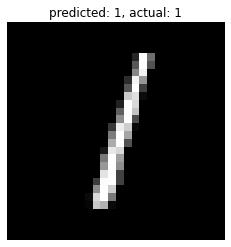

------------------------------------------------------------


In [38]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="gray")
  plt.title(f"predicted: {pred}, actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)

In [39]:
for kohli, dhoni in zip([1,3,4],[7,4,5]):
  print(kohli, dhoni)

1 7
3 4
4 5



y_train - 

data_points | label
-|-
0|7
1|3

X_train 

data_points | data
-|-
0|(28, 28)
1|(28, 28)
2|(28, 28)
3|(28, 28)


data 

data_points | data | label
-|-| -
0|(28, 28) | 7
1|(28, 28) | 3
2|(28, 28)
3|(28, 28)


#Transfer Learning

#New  Problem statement -

Classify handwritten digits into odd and even

In [40]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [41]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
for layer in  pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [43]:
for layer in  pretrained_model.layers[:-1]: #leave the last layer
  print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True


In [44]:
for layer in  pretrained_model.layers[:-1]: #leave the last layer
  layer.trainable=False

In [45]:
for layer in  pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [46]:
lower_trained_model = pretrained_model.layers[:-1]

In [47]:
NEW_LAYERS = [
    lower_trained_model,
    tf.keras.layers.Dense(2, activation='softmax')
]

In [48]:
new_model=tf.keras.models.Sequential(lower_trained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [49]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [50]:
# weights + bias
100*2+2

202

In [51]:
def update_even_odd_labels(labels):
  for idx, label in enumerate(labels):
    labels[idx] = np.where(label%2==0, 1, 0) # 1 -> even, 0 -> odd
  return labels

In [52]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [53]:
np.unique(y_train_bin)

array([0, 1])

In [54]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"])


In [55]:
history=new_model.fit(X_train, y_train_bin, epochs=10, validation_data=(X_valid,y_valid_bin))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1802 - accuracy: 0.9331 - val_loss: 0.1395 - val_accuracy: 0.9516
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9519 - val_loss: 0.1262 - val_accuracy: 0.9568
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9553 - val_loss: 0.1185 - val_accuracy: 0.9606
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1200 - accuracy: 0.9575 - val_loss: 0.1141 - val_accuracy: 0.9622
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1160 - accuracy: 0.9589 - val_loss: 0.1108 - val_accuracy: 0.9628
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1132 - accuracy: 0.9601 - val_loss: 0.1086 - val_accuracy: 0.9632
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1107 - accuracy: 0.9607 - val_loss: 0.1067 - val_accuracy:

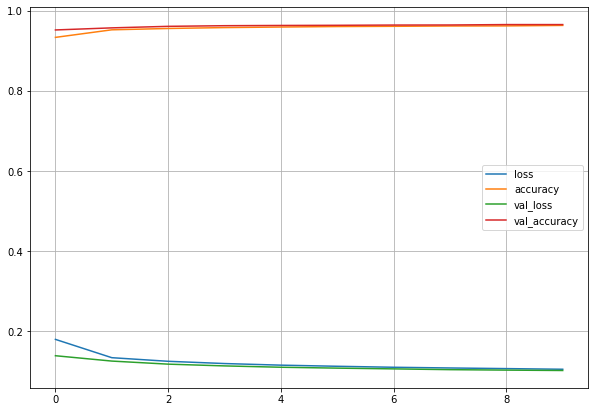

In [56]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [57]:
new_model.evaluate(X_test,y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9612


[0.11330979317426682, 0.9611999988555908]

In [58]:
X_new = X_test[:3]

y_prob =new_model.predict(X_new)
y_prob

array([[9.8768020e-01, 1.2319821e-02],
       [3.1561803e-04, 9.9968445e-01],
       [9.6056944e-01, 3.9430544e-02]], dtype=float32)

In [59]:
y_prob.round(3)

array([[0.988, 0.012],
       [0.   , 1.   ],
       [0.961, 0.039]], dtype=float32)

In [60]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [61]:
y_test_bin[:3]

array([0, 1, 0])

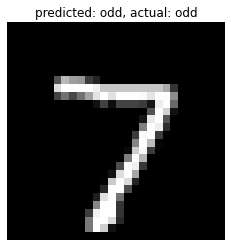

------------------------------------------------------------


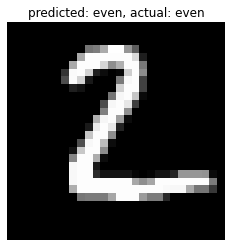

------------------------------------------------------------


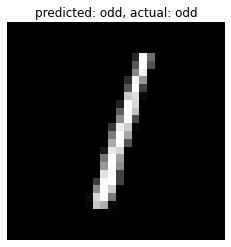

------------------------------------------------------------


In [62]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Train a CNN Model on MNIST Dataset

In [63]:
X_train.shape

(55000, 28, 28)

In [64]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [65]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [66]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [67]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [68]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [69]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [70]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [71]:
X_train_CNN[0].shape

(28, 28, 1)

In [72]:
input_shape=(28,28,1) # (row, col, channels)
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [73]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [74]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [75]:
#Conv layer parameters
(3*3*1 +1)*32

320

In [76]:
#Conv layer output
28 - 3 // 1 + 1

26

In [78]:
#Pooling layer output
(26-2)//2+1

13

In [77]:
#Conv layer parameters
(3*3*32 +1) *64

18496

In [81]:
#Conv layer output
13 - 3 // 1 + 1

11

In [82]:
#Pooling layer output
(11-2)//2+1

5

In [84]:
#flatten layer output
5*5*64

1600

In [83]:
#Output layer parameters
1600*10+10

16010